In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

In [139]:
def load_tweets_data(name): 
    csv_path = os.path.join("./twitter_cleaned/", name) 
    return pd.read_csv(csv_path)

trainTweets = load_tweets_data("train_posts.csv")
testTweets = load_tweets_data("test_posts.csv")

In [140]:
trainTweets.drop(["post_text"],axis=1,inplace=True)
trainTweets.drop(["post_id"],axis=1,inplace=True)
trainTweets.drop(["user_id"],axis=1,inplace=True)
trainTweets.drop(["username"],axis=1,inplace=True)

In [141]:
split_result = trainTweets['image_id'].str.split('_',expand=True)
trainTweets.insert(0, 'event', split_result[0])
trainTweets.drop(["image_id"],axis=1,inplace=True)

In [142]:
trainTweets

,event,timestamp,label
0,boston,Wed Apr 17 18:57:37 +0000 2013,fake
1,boston,Fri Apr 19 07:14:23 +0000 2013,fake
2,boston,Fri Apr 19 07:41:14 +0000 2013,fake
3,boston,Wed Apr 17 16:07:12 +0000 2013,fake
4,boston,Wed Apr 17 00:17:06 +0000 2013,fake
...,...,...,...
13361,garissa,Fri Apr 03 00:11:38 +0000 2015,real
13362,garissa,Fri Apr 03 05:50:14 +0000 2015,real
13363,garissa,Fri Apr 03 02:09:49 +0000 2015,real
13364,garissa,Fri Apr 03 05:05:44 +0000 2015,real


In [144]:
split_time = trainTweets['timestamp'].str.split(' ',expand=True)
split_time = split_time.iloc[:,[5,1,2]]
split_time

,5,1,2
0,2013,Apr,17
1,2013,Apr,19
2,2013,Apr,19
3,2013,Apr,17
4,2013,Apr,17
...,...,...,...
13361,2015,Apr,03
13362,2015,Apr,03
13363,2015,Apr,03
13364,2015,Apr,03


In [145]:
dict_month = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6',
              'Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}
data = []
for index, value in split_time[1].items():
    data.append(dict_month.get(value))

split_time.insert(1, 'time', data)
split_time.drop([1],axis=1,inplace=True)
split_time.columns=['year','month','day']

In [146]:
split_time

,year,month,day
0,2013,4,17
1,2013,4,19
2,2013,4,19
3,2013,4,17
4,2013,4,17
...,...,...,...
13361,2015,4,03
13362,2015,4,03
13363,2015,4,03
13364,2015,4,03


In [70]:
test = split_time
test["time_month"] = test["year"] +'.'+ test["month"]+'.'+ test["day"]
# test.drop(["year"],axis=1,inplace=True)
# test.drop(["month"],axis=1,inplace=True)
# test.drop(["day"],axis=1,inplace=True)
# test.drop(["time"],axis=1,inplace=True)
# test.drop(["time_"],axis=1,inplace=True)
test

,year,month,day,time_month
0,2013,4,17,2013.4.17
1,2013,4,19,2013.4.19
2,2013,4,19,2013.4.19
3,2013,4,17,2013.4.17
4,2013,4,17,2013.4.17
...,...,...,...,...
13361,2015,4,03,2015.4.03
13362,2015,4,03,2015.4.03
13363,2015,4,03,2015.4.03
13364,2015,4,03,2015.4.03


In [71]:
test.drop(["year"],axis=1,inplace=True)
test.drop(["month"],axis=1,inplace=True)
test.drop(["day"],axis=1,inplace=True)

In [72]:
final = pd.concat([trainTweets,test], axis=1)
final.drop(["timestamp"],axis=1,inplace=True)
final.head()

,event,label,time_month
0,boston,fake,2013.4.17
1,boston,fake,2013.4.19
2,boston,fake,2013.4.19
3,boston,fake,2013.4.17
4,boston,fake,2013.4.17


final为最终格式

In [25]:
event = final.event.unique()
print(event,len(event))
final['event'].value_counts()

['boston' 'malaysia' 'passport' 'sandy' 'sochi' 'bringback'
 'columbianChemicals' 'elephant' 'livr' 'pigFish' 'underwater' 'eclipse'
 'samurai' 'nepal' 'garissa'] 15


sandy                 9818
nepal                 1360
boston                 523
malaysia               310
eclipse                275
sochi                  274
samurai                218
columbianChemicals     185
bringback              131
underwater             113
garissa                 79
passport                44
pigFish                 14
elephant                13
livr                     9
Name: event, dtype: int64

In [75]:
sandy = final.loc[final['event'] == 'sandy']

In [76]:
sandy

,event,label,time_month
533,sandy,fake,2012.10.29
534,sandy,fake,2012.10.29
535,sandy,fake,2012.10.29
536,sandy,fake,2012.10.29
537,sandy,fake,2012.10.29
...,...,...,...
11429,sandy,real,2012.11.02
11430,sandy,real,2012.11.02
11431,sandy,real,2012.11.01
11432,sandy,real,2012.11.04


In [77]:
time = sandy.time_month.unique()
print(time,len(time))

['2012.10.29' '2012.10.30' '2012.10.31' '2012.11.01' '2012.11.02'
 '2012.11.04' '2012.11.03' '2012.11.05' '2012.10.28' '2012.10.26'
 '2012.10.25'] 11


In [90]:
dict_sandy = {}
dict_sandy = {}.fromkeys([ti for ti in time])
dict_sandy

{'2012.10.29': None,
 '2012.10.30': None,
 '2012.10.31': None,
 '2012.11.01': None,
 '2012.11.02': None,
 '2012.11.04': None,
 '2012.11.03': None,
 '2012.11.05': None,
 '2012.10.28': None,
 '2012.10.26': None,
 '2012.10.25': None}

In [91]:
class_sandy = ['real', 'fake']
for key in dict_sandy.keys():
    dict_sandy[key] = {}.fromkeys([key for key in class_sandy])
dict_sandy

{'2012.10.29': {'real': None, 'fake': None},
 '2012.10.30': {'real': None, 'fake': None},
 '2012.10.31': {'real': None, 'fake': None},
 '2012.11.01': {'real': None, 'fake': None},
 '2012.11.02': {'real': None, 'fake': None},
 '2012.11.04': {'real': None, 'fake': None},
 '2012.11.03': {'real': None, 'fake': None},
 '2012.11.05': {'real': None, 'fake': None},
 '2012.10.28': {'real': None, 'fake': None},
 '2012.10.26': {'real': None, 'fake': None},
 '2012.10.25': {'real': None, 'fake': None}}

In [92]:
sandy

,event,label,time_month
533,sandy,fake,2012.10.29
534,sandy,fake,2012.10.29
535,sandy,fake,2012.10.29
536,sandy,fake,2012.10.29
537,sandy,fake,2012.10.29
...,...,...,...
11429,sandy,real,2012.11.02
11430,sandy,real,2012.11.02
11431,sandy,real,2012.11.01
11432,sandy,real,2012.11.04


In [104]:
for index, row in sandy.iterrows():
    if dict_sandy[row['time_month']][row['label']] == None:
        dict_sandy[row['time_month']][row['label']] = 1
    else:
        dict_sandy[row['time_month']][row['label']] += 1

In [105]:
dict_sandy

{'2012.10.29': {'real': 446, 'fake': 2104},
 '2012.10.30': {'real': 1337, 'fake': 1884},
 '2012.10.31': {'real': 278, 'fake': 285},
 '2012.11.01': {'real': 682, 'fake': 575},
 '2012.11.02': {'real': 375, 'fake': 308},
 '2012.11.04': {'real': 629, 'fake': 185},
 '2012.11.03': {'real': 405, 'fake': 166},
 '2012.11.05': {'real': 73, 'fake': 51},
 '2012.10.28': {'real': 39, 'fake': 9},
 '2012.10.26': {'real': 3, 'fake': None},
 '2012.10.25': {'real': 4, 'fake': None}}

In [117]:
dict_sandy = dict(sorted(dict_sandy.items(), key=lambda x: x[0]))
dict_sandy

{'2012.10.25': {'real': 4, 'fake': None},
 '2012.10.26': {'real': 3, 'fake': None},
 '2012.10.28': {'real': 39, 'fake': 9},
 '2012.10.29': {'real': 446, 'fake': 2104},
 '2012.10.30': {'real': 1337, 'fake': 1884},
 '2012.10.31': {'real': 278, 'fake': 285},
 '2012.11.01': {'real': 682, 'fake': 575},
 '2012.11.02': {'real': 375, 'fake': 308},
 '2012.11.03': {'real': 405, 'fake': 166},
 '2012.11.04': {'real': 629, 'fake': 185},
 '2012.11.05': {'real': 73, 'fake': 51}}

In [126]:
sandy_df = pd.DataFrame(dict_sandy)
sandy_df = sandy_df.T
sandy_df

,real,fake
2012.10.25,4.0,NaN
2012.10.26,3.0,NaN
2012.10.28,39.0,9.0
2012.10.29,446.0,2104.0
2012.10.30,1337.0,1884.0
2012.10.31,278.0,285.0
2012.11.01,682.0,575.0
2012.11.02,375.0,308.0
2012.11.03,405.0,166.0
2012.11.04,629.0,185.0


<AxesSubplot:>

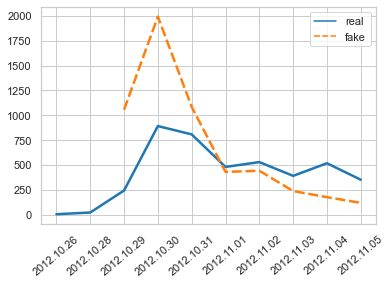

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")


plt.xticks(rotation=30) 
sns.lineplot(data=data, palette="tab10", linewidth=2.5)